Our goal is to use a Fixed Effects model to compare the predictive power between the growth rate in the volume of stocks traded and a stock's daily risk. I judge how well these variables can predict the stock market's daily returns.

I use daily stock market data from the previous six years.

In [1]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

df = yf.download("AAPL MSFT AMZN GOOG FB", period = "6y")

[*********************100%***********************]  5 of 5 completed


In [2]:
# Let's take a look at our data!

df.head()

Adj Close                                                \
                 AAPL        AMZN         FB        GOOG       MSFT   
Date                                                                  
2014-08-01  87.066406  307.059998  72.360001  564.520081  37.790665   
2014-08-04  86.577316  313.649994  73.510002  571.580750  38.240353   
2014-08-05  86.151657  312.320007  72.690002  563.522827  37.984650   
2014-08-06  86.006714  313.890015  72.470001  564.823303  37.684860   
2014-08-07  85.997597  311.450012  73.169998  561.817505  38.116905   

                Close                                                ...  \
                 AAPL        AMZN         FB        GOOG       MSFT  ...   
Date                                                                 ...   
2014-08-01  96.129997  307.059998  72.360001  564.520081  42.860001  ...   
2014-08-04  95.589996  313.649994  73.510002  571.580750  43.369999  ...   
2014-08-05  95.120003  312.320007  72.690002  563.522827  43.080002  ...   
2014-08-06  94.959999  313.890015  72.470001  564.823303  42.740002  ...   
2014-08-07  94.480003  311.450012  73.169998  561.817505  43.230000  ...   

                 Open                                                  Volume  \
                 AAPL        AMZN         FB        GOOG       MSFT      AAPL   
Date                                                                            
2014-08-01  94.900002  313.690002  72.220001  568.838257  43.209999  48511000   
2014-08-04  96.370003  308.839996  72.360001  567.481995  42.970001  39958000   
2014-08-05  95.360001  313.299988  73.199997  568.489197  43.310001  55933000   
2014-08-06  94.750000  310.829987  72.019997  560.241882  42.740002  38558000   
2014-08-07  94.930000  315.209991  73.000000  566.444824  42.840000  46711000   

                                                  
               AMZN        FB     GOOG      MSFT  
Date                                              
2014-08-01  7441500  43535000  1955200  31170300  
2014-08-04  4200900  30777000  1427300  34277400  
2014-08-05  2852100  34986000  1551200  26266400  
2014-08-06  2296900  30986000  1334300  24634000  
2014-08-07  2935600  38141000  1110900  30314900  

[5 rows x 30 columns]

In [3]:
df.describe()

Adj Close                                                      \
              AAPL         AMZN           FB         GOOG         MSFT   
count  1511.000000  1511.000000  1511.000000  1511.000000  1511.000000   
mean    161.019948  1175.293376   144.678491   933.371029    85.016032   
std      67.882070   657.153472    44.736819   275.205740    44.234861   
min      84.962914   286.950012    72.360001   491.201416    36.070190   
25%     106.193851   612.915009   106.834999   713.174988    47.976967   
50%     147.540314   980.349976   148.679993   939.330017    69.401299   
75%     194.303207  1762.010010   180.055000  1149.604980   109.484787   
max     425.040009  3200.000000   253.669998  1568.489990   214.320007   

             Close                                                      ...  \
              AAPL         AMZN           FB         GOOG         MSFT  ...   
count  1511.000000  1511.000000  1511.000000  1511.000000  1511.000000  ...   
mean    166.545539  1175.293376   144.678491   933.371029    88.072138  ...   
std      65.550961   657.153472    44.736819   275.205740    42.918555  ...   
min      90.339996   286.950012    72.360001   491.201416    40.290001  ...   
25%     113.934998   612.915009   106.834999   713.174988    52.045000  ...   
50%     153.339996   980.349976   148.679993   939.330017    72.699997  ...   
75%     197.000000  1762.010010   180.055000  1149.604980   111.989998  ...   
max     425.040009  3200.000000   253.669998  1568.489990   214.320007  ...   

              Open                                                      \
              AAPL         AMZN           FB         GOOG         MSFT   
count  1511.000000  1511.000000  1511.000000  1511.000000  1511.000000   
mean    166.383501  1175.259782   144.598762   932.912172    88.038220   
std      65.301254   657.014955    44.680020   274.527384    42.903558   
min      90.000000   284.399994    70.790001   493.295654    40.340000   
25%     113.844997   615.304993   106.924999   715.664978    51.955000   
50%     153.630005   981.650024   149.000000   936.489990    72.669998   
75%     196.434998  1760.770020   179.974998  1146.075012   111.725002   
max     411.540009  3251.060059   255.820007  1586.989990   216.330002   

             Volume                                                          
               AAPL          AMZN            FB          GOOG          MSFT  
count  1.511000e+03  1.511000e+03  1.511000e+03  1.511000e+03  1.511000e+03  
mean   3.773768e+07  4.256490e+06  2.336617e+07  1.740307e+06  3.062858e+07  
std    1.892816e+07  2.265642e+06  1.399246e+07  8.451962e+05  1.541482e+07  
min    1.136200e+07  8.813000e+05  5.913100e+06  3.475000e+05  7.425600e+06  
25%    2.493520e+07  2.790350e+06  1.473315e+07  1.236800e+06  2.145380e+07  
50%    3.278940e+07  3.640500e+06  1.986580e+07  1.523800e+06  2.699280e+07  
75%    4.564905e+07  4.956600e+06  2.713630e+07  1.975050e+06  3.476410e+07  
max    1.898463e+08  2.385610e+07  1.698037e+08  1.116490e+07  2.025224e+08  

[8 rows x 30 columns]

In [4]:
# We only care about the closing price and the volume of stocks traded.

df = df[['Adj Close', 'Volume']]
df.head()


Adj Close                                                  Volume  \
                 AAPL        AMZN         FB        GOOG       MSFT      AAPL   
Date                                                                            
2014-08-01  87.066406  307.059998  72.360001  564.520081  37.790665  48511000   
2014-08-04  86.577316  313.649994  73.510002  571.580750  38.240353  39958000   
2014-08-05  86.151657  312.320007  72.690002  563.522827  37.984650  55933000   
2014-08-06  86.006714  313.890015  72.470001  564.823303  37.684860  38558000   
2014-08-07  85.997597  311.450012  73.169998  561.817505  38.116905  46711000   

                                                  
               AMZN        FB     GOOG      MSFT  
Date                                              
2014-08-01  7441500  43535000  1955200  31170300  
2014-08-04  4200900  30777000  1427300  34277400  
2014-08-05  2852100  34986000  1551200  26266400  
2014-08-06  2296900  30986000  1334300  24634000  
2014-08-07  2935600  38141000  1110900  30314900

In [5]:
# I am calculating the daily percentage change in a stock's closing price. 

returns = df['Adj Close'].pct_change() 
volatility = returns.rolling(2).std() # I use the standard deviation to measure stock market risk. 
vgr = df['Volume'].pct_change()

adj_close = df['Adj Close']
volume = df['Volume']
date = pd.Series(df.index.values)

df = pd.DataFrame([[adj_close, volume, date]], columns = ['Adj Close', 'Volume', 'Date'])

df = pd.concat([adj_close, volume, returns, volatility, vgr], keys = ['Adj Close', 'Volume', 'Returns', 'Risk', 'VGR'], axis = 1)
df.head()

Adj Close                                                  Volume  \
                 AAPL        AMZN         FB        GOOG       MSFT      AAPL   
Date                                                                            
2014-08-01  87.066406  307.059998  72.360001  564.520081  37.790665  48511000   
2014-08-04  86.577316  313.649994  73.510002  571.580750  38.240353  39958000   
2014-08-05  86.151657  312.320007  72.690002  563.522827  37.984650  55933000   
2014-08-06  86.006714  313.890015  72.470001  564.823303  37.684860  38558000   
2014-08-07  85.997597  311.450012  73.169998  561.817505  38.116905  46711000   

                                                  ...      Risk            \
               AMZN        FB     GOOG      MSFT  ...      AAPL      AMZN   
Date                                              ...                       
2014-08-01  7441500  43535000  1955200  31170300  ...       NaN       NaN   
2014-08-04  4200900  30777000  1427300  34277400  ...       NaN       NaN   
2014-08-05  2852100  34986000  1551200  26266400  ...  0.000496  0.018174   
2014-08-06  2296900  30986000  1334300  24634000  ...  0.002287  0.006553   
2014-08-07  2935600  38141000  1110900  30314900  ...  0.001115  0.009051   

                                               VGR                      \
                  FB      GOOG      MSFT      AAPL      AMZN        FB   
Date                                                                     
2014-08-01       NaN       NaN       NaN       NaN       NaN       NaN   
2014-08-04       NaN       NaN       NaN -0.176311 -0.435477 -0.293052   
2014-08-05  0.019126  0.018813  0.013142  0.399795 -0.321074  0.136758   
2014-08-06  0.005748  0.011600  0.000853 -0.310640 -0.194664 -0.114331   
2014-08-07  0.008970  0.005395  0.013688  0.211448  0.278070  0.230911   

                                
                GOOG      MSFT  
Date                            
2014-08-01       NaN       NaN  
2014-08-04 -0.269998  0.099681  
2014-08-05  0.086807 -0.233711  
2014-08-06 -0.139827 -0.062148  
2014-08-07 -0.167429  0.230612  

[5 rows x 25 columns]

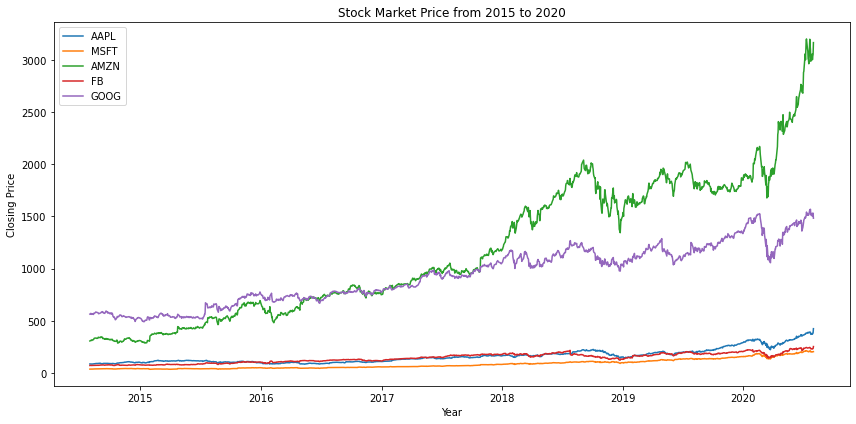

In [6]:
plt.figure(figsize = (12, 6))
plt.title("Stock Market Price from 2015 to 2020")
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.plot(df['Adj Close']['AAPL'], label = "AAPL")
plt.plot(df['Adj Close']['MSFT'], label = "MSFT")
plt.plot(df['Adj Close']['AMZN'], label = "AMZN")
plt.plot(df['Adj Close']['FB'], label = "FB")
plt.plot(df['Adj Close']['GOOG'], label = "GOOG")
plt.legend()
plt.tight_layout()

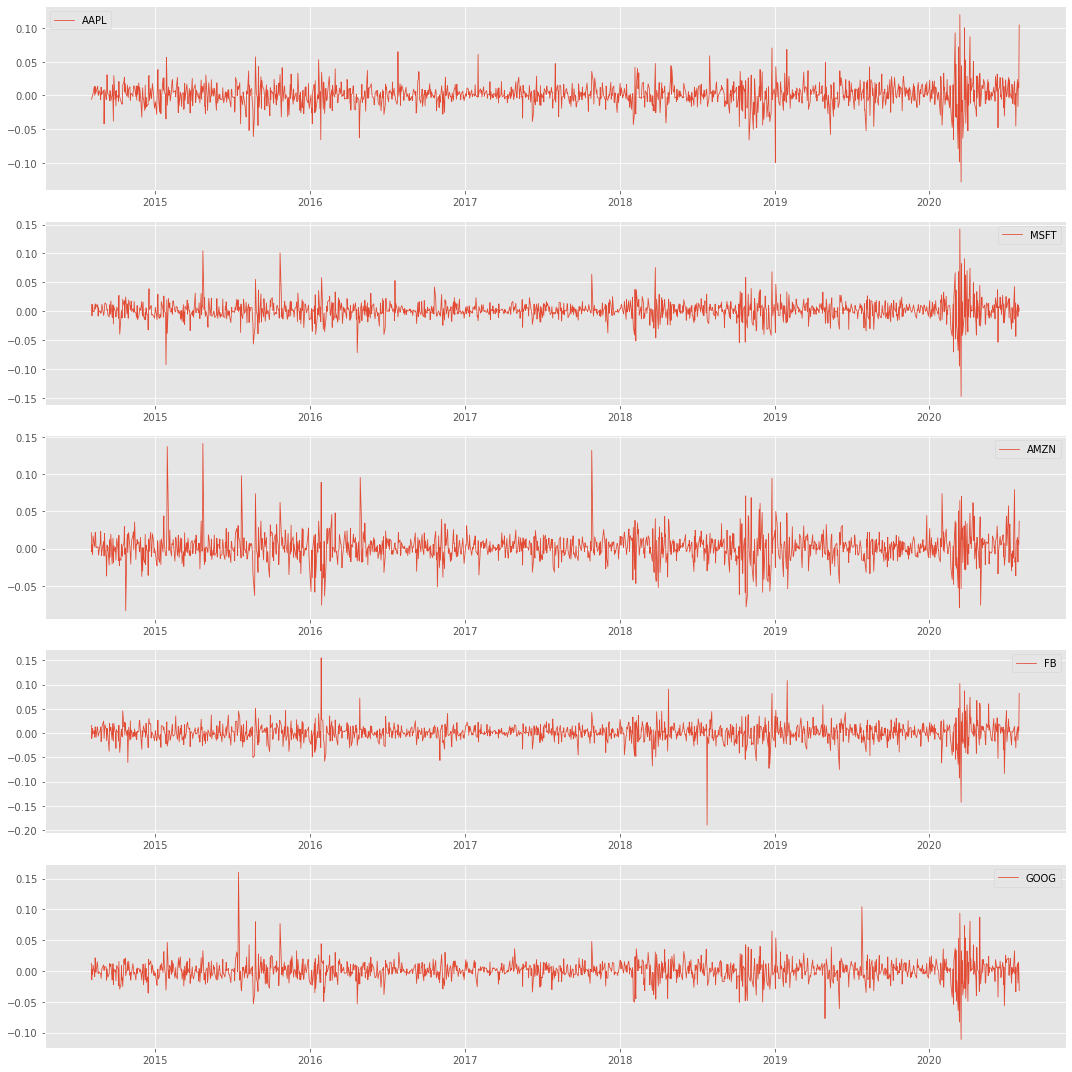

In [7]:
plt.style.use('ggplot')
fig, axs = plt.subplots(5, figsize = (15, 15))
axs[0].plot(df['Returns']['AAPL'], label = "AAPL", lw = 0.8)
axs[0].legend()
axs[1].plot(df['Returns']['MSFT'], label = "MSFT", lw = 0.8)
axs[1].legend()
axs[2].plot(df['Returns']['AMZN'], label = "AMZN", lw = 0.8)
axs[2].legend()
axs[3].plot(df['Returns']['FB'], label = "FB", lw = 0.8)
axs[3].legend()
axs[4].plot(df['Returns']['GOOG'], label = "GOOG", lw = 0.8)
axs[4].legend()
plt.tight_layout()

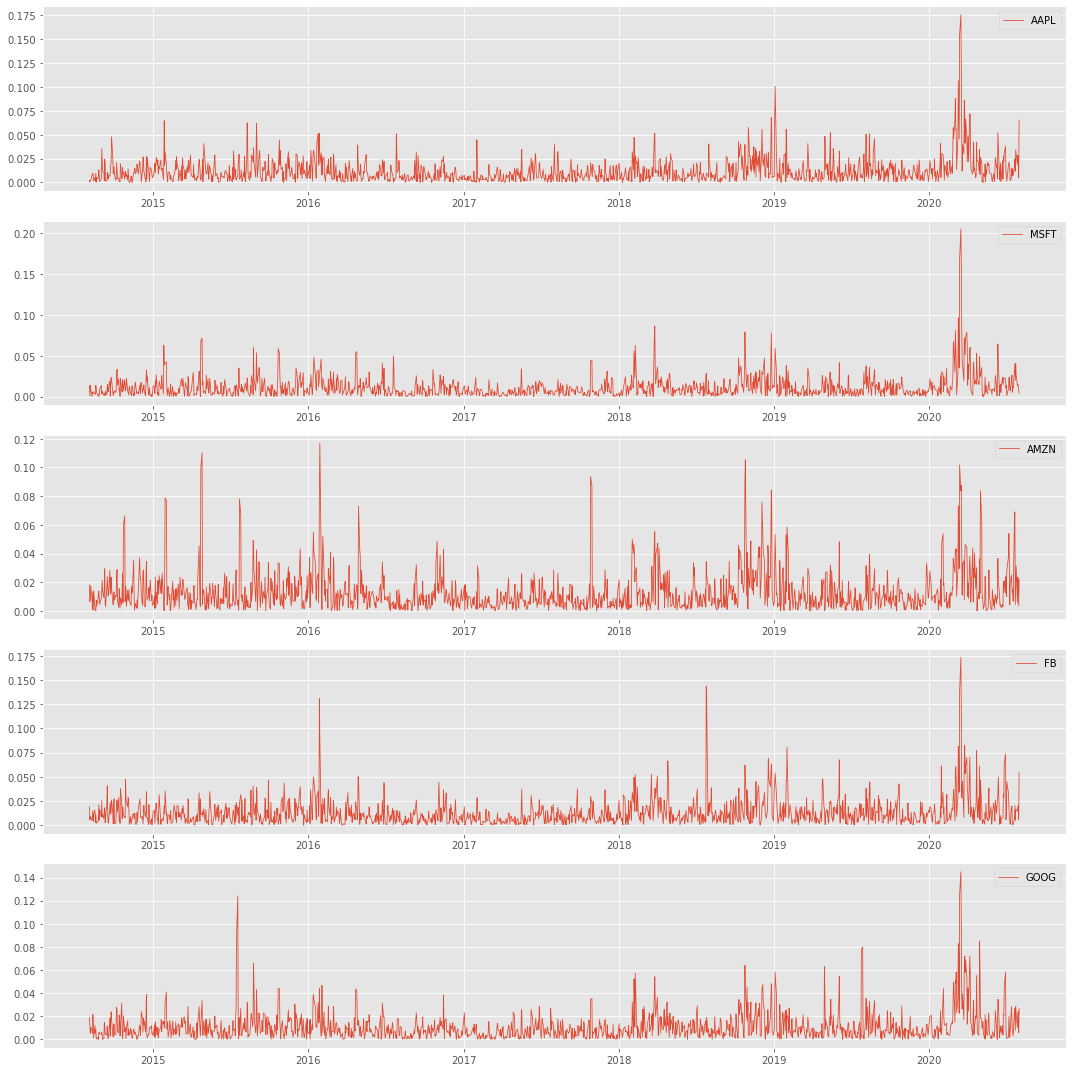

In [8]:
# Interestingly, all stocks experienced their highest market correction at around the time when lockdowns began to happen.

fig, axs = plt.subplots(5, figsize = (15, 15))
plt.style.use('ggplot')
axs[0].plot(df['Risk']['AAPL'], label = "AAPL", lw = 0.8)
axs[0].legend()
axs[1].plot(df['Risk']['MSFT'], label = "MSFT", lw = 0.8)
axs[1].legend()
axs[2].plot(df['Risk']['AMZN'], label = "AMZN", lw = 0.8)
axs[2].legend()
axs[3].plot(df['Risk']['FB'], label = "FB", lw = 0.8)
axs[3].legend()
axs[4].plot(df['Risk']['GOOG'], label = "GOOG", lw = 0.8)
axs[4].legend()
plt.tight_layout()

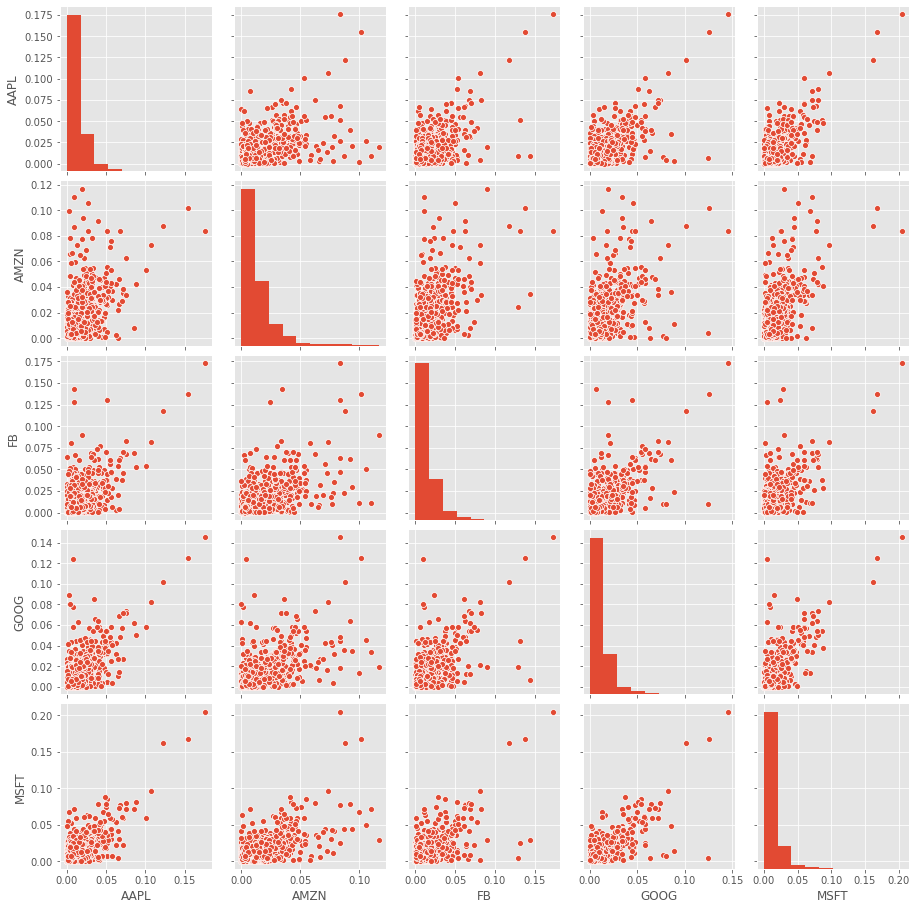

In [9]:
# How does the risk of one stock relate to the risk of other stocks?

# Generally, there is a positive correlation between the risk of one stock and the risk of another stock. This makes sense 

# because these companies are in the same sector and have their headquarters in the same country. Therefore, they likely 

# encounter similar risks. 
sns.pairplot(df['Risk'])

In [10]:
# Here, I am reformatting the dataframe so that it looks more like a panel data set, which will make it easier to perform

# Fixed Effects analysis. 

df = df.stack().reset_index().dropna()
df.head()


,Date,level_1,Adj Close,Volume,Returns,Risk,VGR
10,2014-08-05,AAPL,86.151657,55933000,-0.004917,0.000496,0.399795
11,2014-08-05,AMZN,312.320007,2852100,-0.004240,0.018174,-0.321074
12,2014-08-05,FB,72.690002,34986000,-0.011155,0.019126,0.136758
13,2014-08-05,GOOG,563.522827,1551200,-0.014098,0.018813,0.086807
14,2014-08-05,MSFT,37.984650,26266400,-0.006687,0.013142,-0.233711


In [11]:
df = df.rename({'level_1':'Name'}, axis = 1) # Renaming the level_1 column
df = df.reset_index()
df = df.sort_values(by = ['Name', 'Date'], ascending = True) # Sort by date to allow for proper timeseries split.
df = df.reset_index().drop(['level_0', 'index'], axis = 1) # Again, dropping unnecessary columns
df.head()

,Date,Name,Adj Close,Volume,Returns,Risk,VGR
0,2014-08-05,AAPL,86.151657,55933000,-0.004917,0.000496,0.399795
1,2014-08-06,AAPL,86.006714,38558000,-0.001682,0.002287,-0.310640
2,2014-08-07,AAPL,85.997597,46711000,-0.000106,0.001115,0.211448
3,2014-08-08,AAPL,86.234283,41865000,0.002752,0.002021,-0.103744
4,2014-08-11,AAPL,87.372047,36585000,0.013194,0.007383,-0.126120


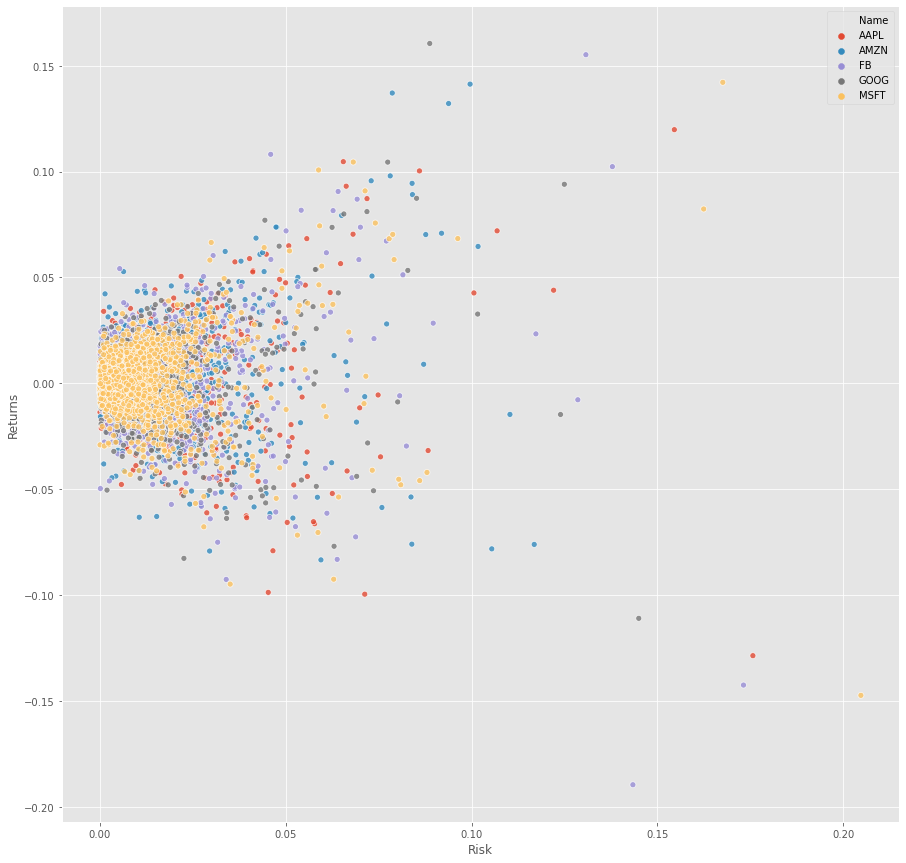

In [12]:
# As risk increases, the difference between gains and losses increases

plt.figure(figsize = (15, 15))

sns.scatterplot(data = df, x = 'Risk', y ='Returns', hue = 'Name', alpha = 0.8)

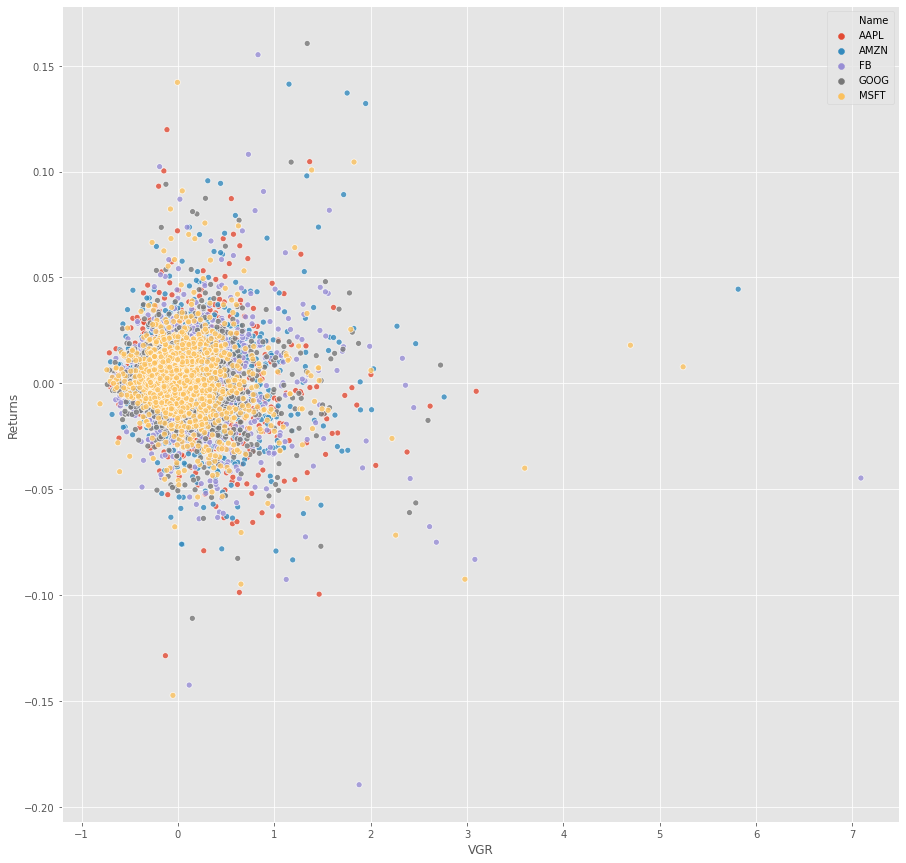

In [13]:
# The relationship between the daily growth rate in the volume of stocks traded and the daily returns is somewhat similar

# to the previous relationship between risk and daily returns. Specifically, as the growth rate in volume increases, there is

# wider divergence in the daily returns. 

plt.figure(figsize = (15, 15))

sns.scatterplot(data = df, x = 'VGR', y ='Returns', hue = 'Name', alpha = 0.8)

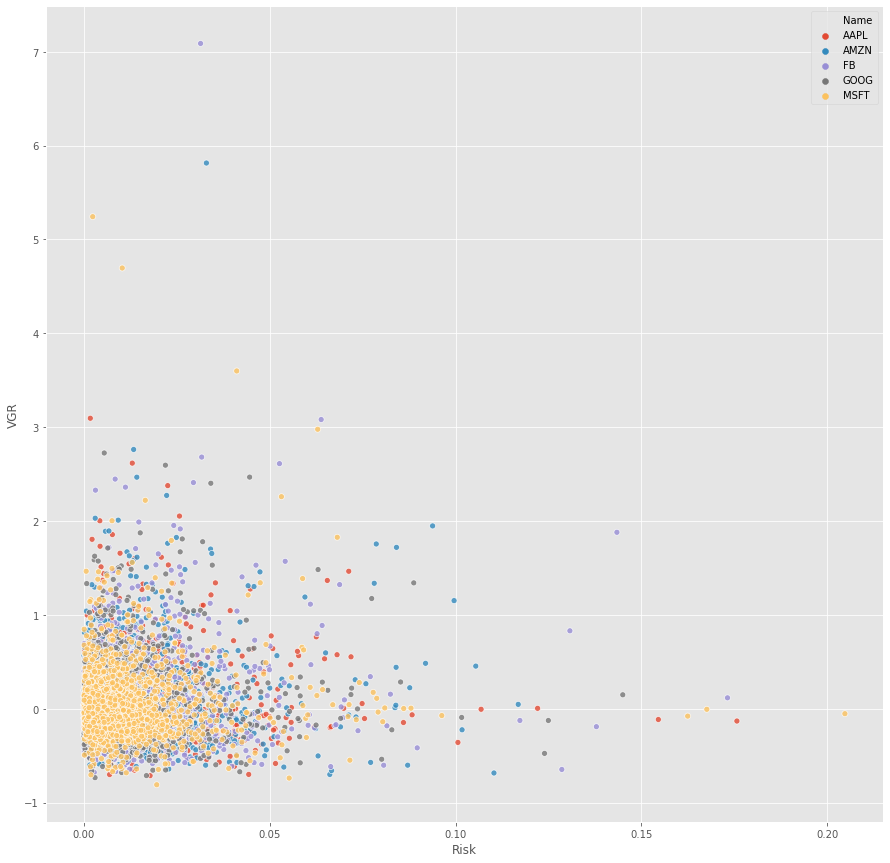

In [14]:
# The growth rate in volume is small when risk is high. Again, this makes sense, as investors are less likely to trade stocks

# when the market is especially volatile. 

plt.figure(figsize = (15, 15))

sns.scatterplot(data = df, x = 'Risk', y ='VGR', hue = 'Name', alpha = 0.8)

In [15]:
# The average daily return for most tech stocks is 0.1 %. Google is the glaring exception, with an average daily return 

# of 0.07%. However, Google also has the lowest risk and the highest liquidity. FB has the highest daily growth rate in the 

# volume of stocks traded.

df.groupby(by = 'Name').mean()

,Adj Close,Volume,Returns,Risk,VGR
Name,,,,,
AAPL,161.118289,3.772907e+07,0.001214,0.012443,0.057501
AMZN,1176.439748,4.254416e+06,0.001715,0.013209,0.064896
FB,144.773578,2.334789e+07,0.001012,0.013554,0.068890
GOOG,933.855218,1.740372e+06,0.000769,0.011479,0.061172
MSFT,85.078325,3.062581e+07,0.001259,0.012042,0.056624


In [16]:
df = df.sort_values(by = 'Date').reset_index().drop('index', axis = 1)
df.head(20)

,Date,Name,Adj Close,Volume,Returns,Risk,VGR
0,2014-08-05,AAPL,86.151657,55933000,-0.004917,0.000496,0.399795
1,2014-08-05,AMZN,312.320007,2852100,-0.004240,0.018174,-0.321074
2,2014-08-05,FB,72.690002,34986000,-0.011155,0.019126,0.136758
3,2014-08-05,GOOG,563.522827,1551200,-0.014098,0.018813,0.086807
4,2014-08-05,MSFT,37.984650,26266400,-0.006687,0.013142,-0.233711
5,2014-08-06,FB,72.470001,30986000,-0.003027,0.005748,-0.114331
6,2014-08-06,GOOG,564.823303,1334300,0.002308,0.011600,-0.139827
7,2014-08-06,AMZN,313.890015,2296900,0.005027,0.006553,-0.194664
8,2014-08-06,AAPL,86.006714,38558000,-0.001682,0.002287,-0.310640
9,2014-08-06,MSFT,37.684860,24634000,-0.007892,0.000853,-0.062148


In [17]:
from sklearn.model_selection import TimeSeriesSplit
import statsmodels.api as sm
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf

In [18]:
# Instantiate TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits = 10)

# Assign the dependent variable and covariates 
X = df[['Name', 'Risk', 'VGR']]
y = df[['Returns']]

# R2 Score for each model
r21 = []
r22 = []
r23 = []

# Cross Validation 

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    X_train = sm.add_constant(X_train)
    
    dat = pd.DataFrame({'Returns': list(y_train['Returns']), 'Risk': list(X_train['Risk']), 'VGR': list(X_train['VGR']), 'Name': list(X_train['Name'])})
    
    # Create the Models
    
    mod1 = smf.ols('Returns ~ Risk + VGR + C(Name)', data = dat).fit()
    mod2 = smf.ols('Returns ~ Risk + C(Name)', data = dat).fit()
    mod3 = smf.ols('Returns ~ VGR + C(Name)', data = dat).fit()
    
    # Predictions
    ypred1 = mod1.predict(X_test)
    ypred2 = mod2.predict(X_test)
    ypred3 = mod3.predict(X_test)
    
    # Evaluation Metrics
    r21.append(r2_score(y_test, ypred1))
    
    
    r22.append(r2_score(y_test, ypred2))
    
    r23.append(r2_score(y_test, ypred3))

print("The R2 Score For Each is:")
print("\n Model 1: {}\n Model 2: {}\n Model 3: {}".format(sum(r21) / len(r21), sum(r22)/len(r22), sum(r23)/ len(r23)))

The R2 Score For Each is:

 Model 1: -0.0027563448977864224
 Model 2: -0.004833825669516267
 Model 3: -0.001317063355608905


The negative r2 scores suggest that each model performs worst than a horizantal line at predicting the daily returns in stock prices. This is to be expected. The scatter plots from earlier did not reveal a clear indication of the relationship between risk and the daily growth rate in the volume of stocks traded, and the daily returns.

One way to improve our model would be to add lagged variables of each variable as covariates. Specifically, it is likely that the daily returns from yesterday should impact the daily returns from today. 